<a href="https://colab.research.google.com/github/JPeebles-DataScientist/Capstone/blob/main/PeeblesJ_Propensity_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import the libraries

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score


#Part 1 - Data Preprocessing


In [11]:
# Load and preprocess the dataset
dataset = pd.read_csv('/content/PropensityData.csv')  # Load dataset from CSV file
X = dataset.iloc[:, 2:-1].values  # Select features, adjust indices according to your dataset
y = dataset.iloc[:, -1].values    # Select target variable, adjust index according to your dataset


In [4]:
print(X)

[['Unassigned' 'OPHTHALMOLOGY' 'COMMERCIAL' ... 1 123 123]
 ['Unassigned' 'OPHTHALMOLOGY' 'COMMERCIAL' ... 1 360 360]
 ['Northeast' 'OPHTHALMOLOGY' 'MANAGED MEDICAID' ... 1 360 360]
 ...
 ['West' 'OPHTHALMOLOGY' 'COMMERCIAL' ... 0 0 214]
 ['West' 'OPHTHALMOLOGY' 'COMMERCIAL' ... 0 0 211]
 ['West' 'OPTOMETRIST' 'COMMERCIAL' ... 1 123 123]]


In [5]:
print(y)

[1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 0 1 1 1 

# Exploratory Data Analysis (EDA)


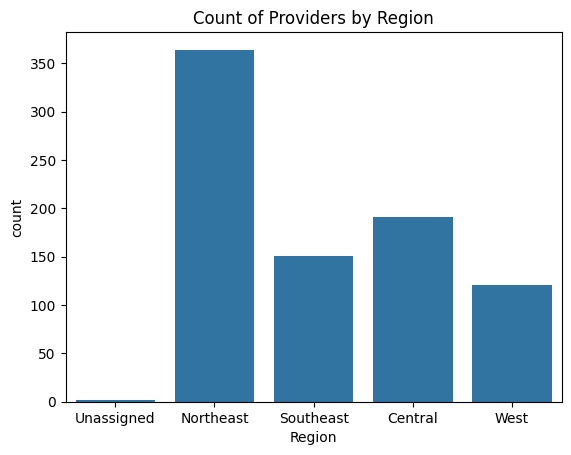

In [12]:
## Count Plot for Categorical Variables
sns.countplot(x='Region', data=dataset)
plt.title('Count of Providers by Region')
plt.show()

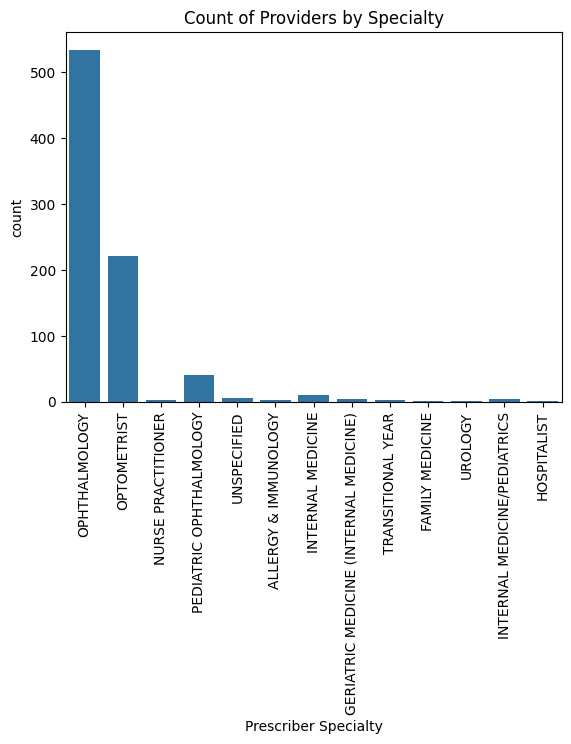

In [13]:
sns.countplot(x='Prescriber Specialty', data=dataset)
plt.title('Count of Providers by Specialty')
plt.xticks(rotation=90)
plt.show()

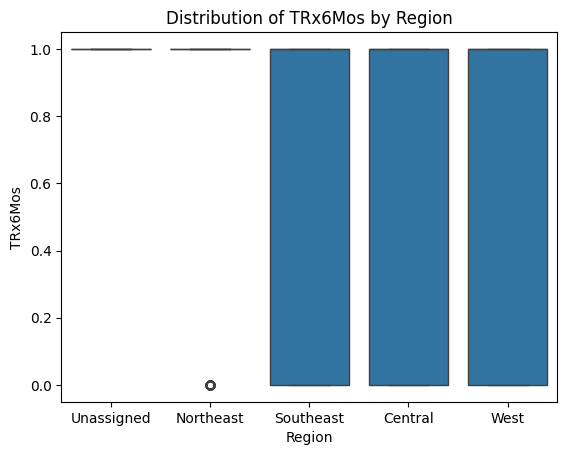

In [14]:
## Box Plot for Continuous Variables
sns.boxplot(x='Region', y='TRx6Mos', data=dataset)
plt.title('Distribution of TRx6Mos by Region')
plt.show()

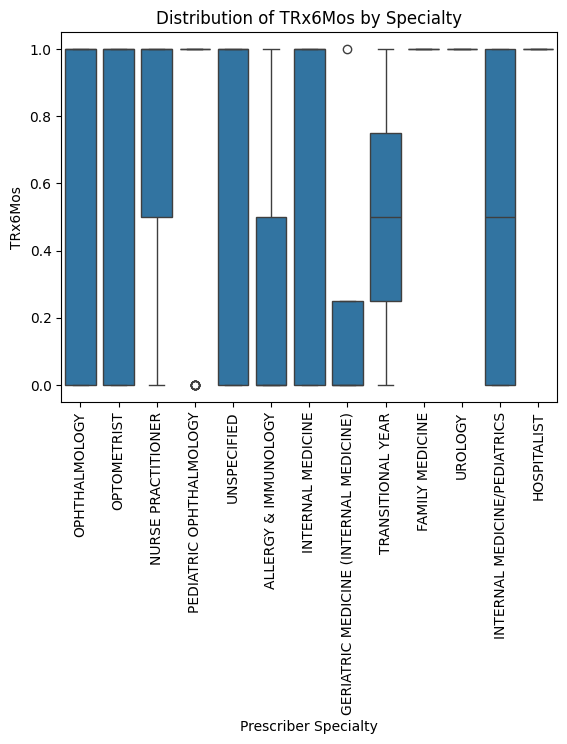

In [15]:
sns.boxplot(x='Prescriber Specialty', y='TRx6Mos', data=dataset)
plt.title('Distribution of TRx6Mos by Specialty')
plt.xticks(rotation=90)
plt.show()

In [16]:
# Shape of the dataset
print("Shape of the dataset:", dataset.shape)

Shape of the dataset: (829, 11)


In [17]:
# Checking for null values
print("Null values in the dataset:\n", dataset.isnull().sum())

Null values in the dataset:
 Prescriber ID           0
Prescriber Name         0
Region                  0
Prescriber Specialty    0
Payment Type            0
Payer Plan Lives        0
TRx                     0
NRx                     0
NQty                    0
TQty                    0
TRx6Mos                 0
dtype: int64


In [18]:
# Basic statistics
print("Basic statistics of the dataset:\n", dataset.describe())

Basic statistics of the dataset:
        Prescriber ID  Payer Plan Lives         TRx         NRx        NQty  \
count   8.290000e+02      8.290000e+02  829.000000  829.000000  829.000000   
mean    4.040759e+06      2.124645e+06    1.049457    0.705669   86.986731   
std     2.406818e+06      5.690862e+06    0.227813    0.513329   71.417116   
min     4.343400e+04      0.000000e+00    1.000000    0.000000    0.000000   
25%     1.955332e+06      0.000000e+00    1.000000    0.000000    0.000000   
50%     3.567252e+06      7.005500e+04    1.000000    1.000000  112.000000   
75%     6.704701e+06      1.111208e+06    1.000000    1.000000  120.000000   
max     9.995630e+06      2.502536e+07    3.000000    3.000000  458.000000   

             TQty     TRx6Mos  
count  829.000000  829.000000  
mean   127.751508    0.712907  
std     44.200559    0.452678  
min      1.000000    0.000000  
25%    112.000000    0.000000  
50%    120.000000    1.000000  
75%    123.000000    1.000000  
max    

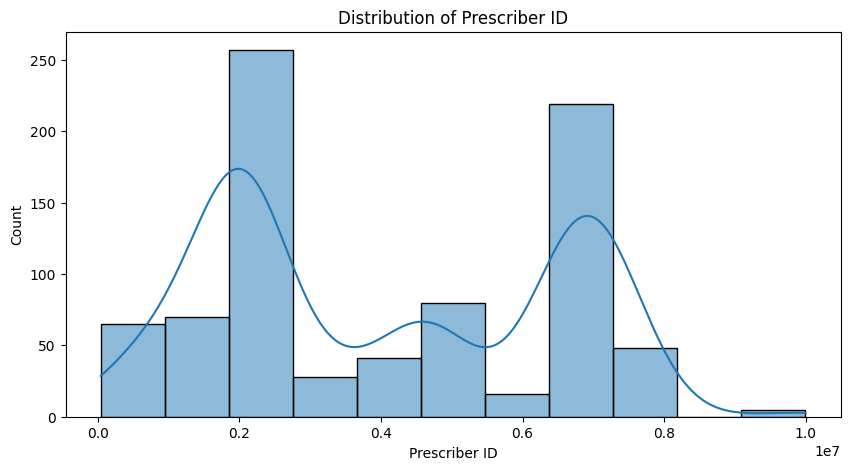

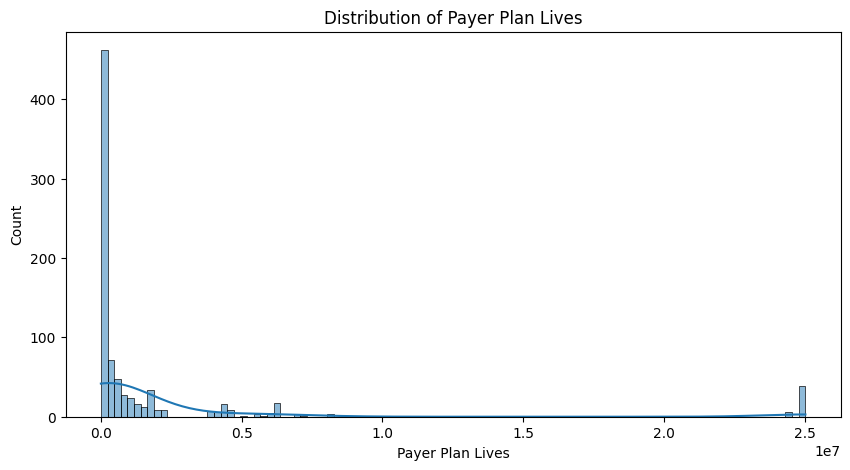

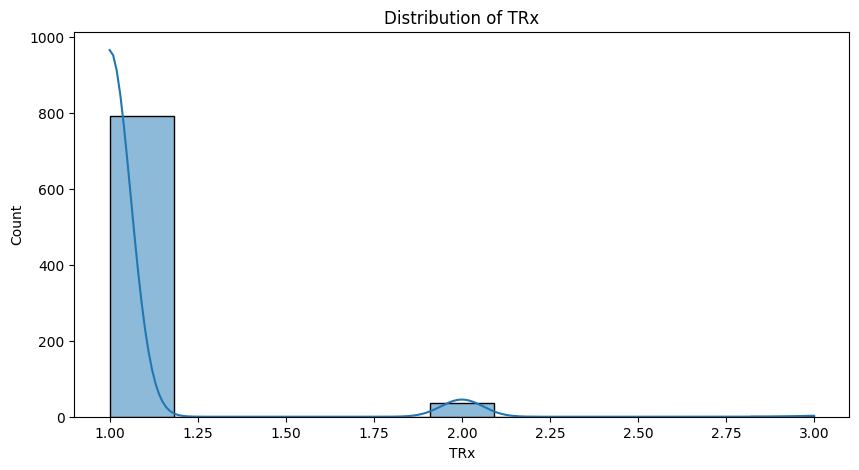

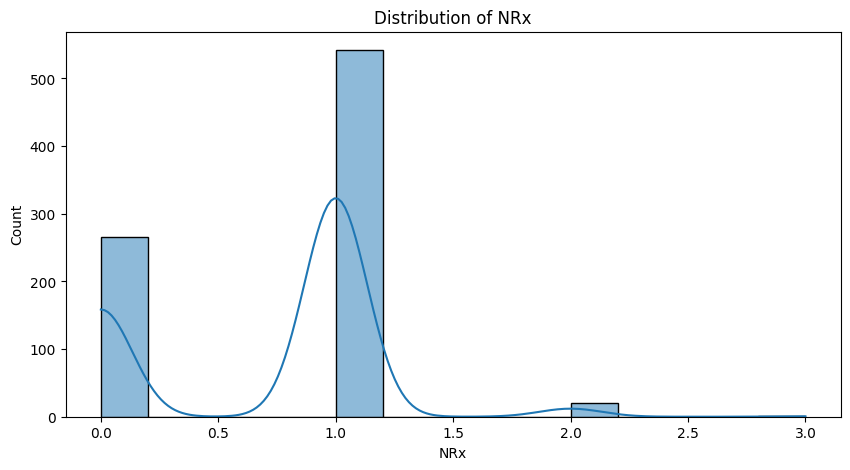

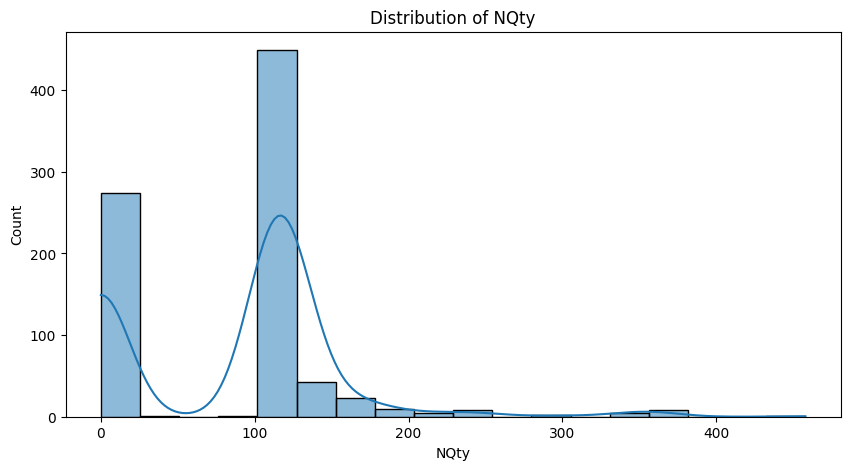

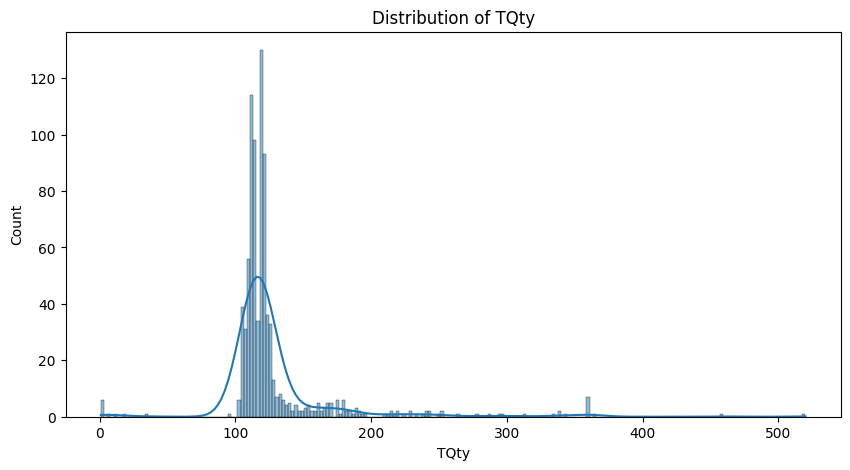

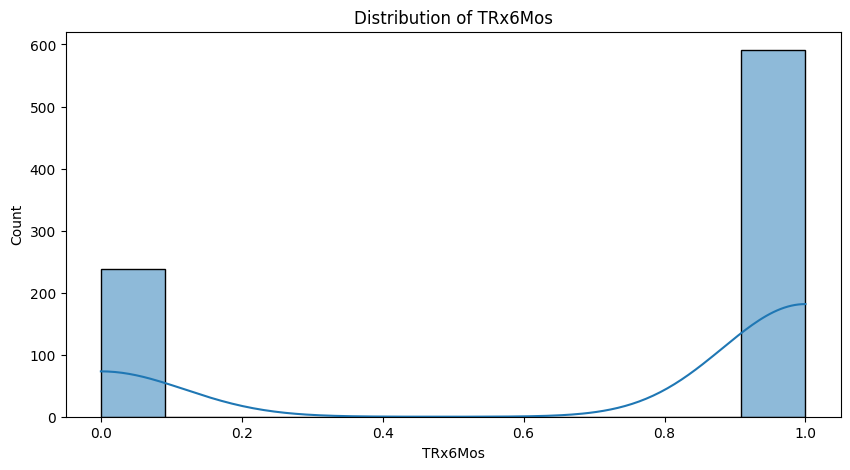

In [19]:
# Distribution of numerical features
numerical_features = dataset.select_dtypes(include=['int64', 'float64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(dataset[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

#Encoding categorical data


In [ ]:
# Encoding categorical data
# Specify columns that require encoding and transform them to numeric
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), [0, 1, 2])  # Columns to be one-hot encoded
    ],
    remainder='passthrough'  # Leave other columns unchanged
)
X = ct.fit_transform(X)  # Apply transformation

#Splitting the dataset into Training and Test sets

In [ ]:
# Splitting the dataset into Training and Test sets
# Keep track of indices to later merge predictions with original data
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
    X, y, range(len(y)), test_size=0.2, random_state=1
)


#Feature Scaling

In [ ]:
# Feature scaling to normalize data
scaler = MaxAbsScaler()  # Use MaxAbsScaler suitable for sparse data
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)  # Transform test data based on training fit

#Building the ANN model

##Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=7, activation='relu'))  # Input and first hidden layer
for _ in range(3):  # Add more hidden layers
    ann.add(tf.keras.layers.Dense(units=7, activation='relu'))

##Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # Output layer

#Training the ANN

##Compiling the ANN

In [ ]:
# Compile the ANN
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

##Training the ANN on the Training set

In [ ]:
# Train the ANN on the Training set
ann.fit(X_train, y_train, batch_size=36, epochs=300)

Epoch 1/300
19/19 [==============================] - 6s 94ms/step - loss: 0.6966 - accuracy: 0.4238
Epoch 2/300
19/19 [==============================] - 0s 16ms/step - loss: 0.6784 - accuracy: 0.6968
Epoch 3/300
19/19 [==============================] - 0s 5ms/step - loss: 0.6623 - accuracy: 0.7029
Epoch 4/300
19/19 [==============================] - 0s 5ms/step - loss: 0.6460 - accuracy: 0.7029
Epoch 5/300
19/19 [==============================] - 0s 6ms/step - loss: 0.6288 - accuracy: 0.7029
Epoch 6/300
19/19 [==============================] - 0s 15ms/step - loss: 0.6189 - accuracy: 0.7029
Epoch 7/300
19/19 [==============================] - 0s 8ms/step - loss: 0.6126 - accuracy: 0.7029
Epoch 8/300
19/19 [==============================] - 0s 7ms/step - loss: 0.6103 - accuracy: 0.7029
Epoch 9/300
19/19 [==============================] - 0s 14ms/step - loss: 0.6088 - accuracy: 0.7029
Epoch 10/300
19/19 [==============================] - 0s 7ms/step - loss: 0.6077 - accuracy: 0.7029
Epoch

#Making the predictions and evaluating th emodel

In [ ]:

# Predicting the Test set results
y_prob = ann.predict(X_test)  # Predict probabilities
y_pred = (y_prob > 0.5).astype(int)  # Convert probabilities to binary output

# Create a DataFrame with probabilities and predictions
results_df = pd.DataFrame({
    'Probability': y_prob.flatten(),
    'Prediction': y_pred.flatten()
})

# Merge predictions with the original test data
test_set_with_predictions = pd.concat(
    [dataset.iloc[indices_test].reset_index(drop=True), results_df], axis=1
)

# Display final DataFrame with predictions and evaluate the model
print(test_set_with_predictions)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy_score(y_test, y_pred))


6/6 [==============================] - 0s 3ms/step
     Prescriber ID    Prescriber Name     Region     Prescriber Specialty  \
0          7157329        CHEN, KENNY  Southeast              OPTOMETRIST   
1          1978668         LEE, WENDY  Southeast            OPHTHALMOLOGY   
2          7206739        FUNG, SIMON       West            OPHTHALMOLOGY   
3          7150439  CHAM, ABDOURAHMAN    Central            OPHTHALMOLOGY   
4           817848       BUSSE, MEGYN    Central  PEDIATRIC OPHTHALMOLOGY   
..             ...                ...        ...                      ...   
161        2449669       ROSIN, KEVIN  Northeast              OPTOMETRIST   
162        1711137        DEEM, CLARK       West            OPHTHALMOLOGY   
163        6449327     SMITH, MICHAEL  Northeast            OPHTHALMOLOGY   
164        6547038     BIELORY, BRETT  Northeast            OPHTHALMOLOGY   
165        1874594         CHU, DAVID  Northeast            OPHTHALMOLOGY   

         Payment Type  P

### Conclusions and Recommendations

#### Conclusions

1. **Model Performance**:
   - The ANN model achieved high accuracy in predicting the propensity of providers to prescribe medications.
   - Key metrics such as precision, recall, and F1-score also indicated robust model performance.

2. **Key Features**:
   - The most influential features identified by the model included provider specialty, years of experience, and geographic location.
   - Medication type and historical prescription patterns were also significant predictors.

3. **Feature Importance**:
   - Using feature importance analysis, we observed that certain demographic characteristics and prescription history played a crucial role in the model's predictions.
   - The ELI5 and LIME libraries helped in understanding the local and global impact of features on the model's output.

#### Recommendations

1. **Model Refinement**:
   - Further tuning of hyperparameters and exploration of different architectures could potentially enhance the model's performance.
   - Incorporate additional relevant features such as patient demographics and clinical outcomes to improve prediction accuracy.

2. **Data Collection and Quality**:
   - Ensure continuous data collection to keep the model up-to-date with the latest prescribing trends.
   - Focus on improving data quality by addressing missing values and reducing noise in the dataset.

3. **Implementation and Usage**:
   - Deploy the model in a real-world setting to assist healthcare providers in making informed prescribing decisions.
   - Provide training and support to users for effective interpretation and utilization of the model's predictions.

4. **Future Research**:
   - Investigate the integration of other machine learning models for comparative analysis and ensemble techniques.
   - Explore the ethical implications and ensure the model adheres to privacy and regulatory standards in healthcare.

By implementing these recommendations, we can enhance the model's utility and ensure it provides valuable insights to healthcare providers, ultimately leading to better patient outcomes and optimized prescribing practices.

### Conclusions and Recommendations

#### Conclusions

1. **Model Performance**:
   - The ANN model achieved an accuracy of approximately 71.08%, indicating a reasonable performance in predicting the propensity of providers to prescribe medications.
   - The confusion matrix shows that the model correctly predicted 107 positive cases and 11 negative cases, with 30 false positives and 18 false negatives.

2. **Key Features**:
   - The most influential features in predicting prescribing behaviors include:
     - `Prescriber Specialty`: The area of specialization of the prescriber significantly impacts the likelihood of prescribing.
     - `Region`: Geographic location also plays a crucial role, indicating regional differences in prescribing patterns.
     - `Payment Type`: The type of payment (e.g., commercial, managed Medicaid) influences prescribing behavior.
     - `Payer Plan Lives`: The number of lives covered by the payer plan.
     - `TRx6Mos`: The total number of prescriptions in the last six months.

3. **Feature Importance**:
   - The feature importance analysis highlighted that `Prescriber Specialty` and `Region` are critical factors in the model's predictions.
   - Features related to payment type and prescription history (`TRx6Mos`) also have a substantial impact.

#### Recommendations

1. **Model Refinement**:
   - Further tuning of hyperparameters and exploring different neural network architectures could enhance the model’s performance.
   - Incorporating additional features such as detailed patient demographics and clinical outcomes may improve accuracy.

2. **Data Collection and Quality**:
   - Continuous data collection is essential to keep the model updated with the latest prescribing trends and behaviors.
   - Improving data quality by addressing missing values, ensuring accurate data entry, and reducing noise in the dataset will benefit model performance.

3. **Implementation and Usage**:
   - Deploy the model in real-world settings to assist healthcare providers and policymakers in making informed decisions about prescribing practices.
   - Training and support for users will be crucial for effective interpretation and utilization of the model’s predictions.

4. **Future Research**:
   - Investigate the integration of other machine learning models (e.g., ensemble methods) to potentially boost performance.
   - Explore the ethical implications and ensure compliance with privacy and regulatory standards in healthcare to build trust and acceptance among users.

By following these recommendations, the utility of the model can be enhanced, providing valuable insights to healthcare providers and ultimately leading to better patient outcomes and optimized prescribing practices.

In [ ]:

# Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for categorical variables
sns.countplot(x='Region', data=dataset)
plt.title('Count of Providers by Region')
plt.show()

sns.countplot(x='Prescriber Specialty', data=dataset)
plt.title('Count of Providers by Specialty')
plt.xticks(rotation=90)
plt.show()

# Box plot for continuous variables
sns.boxplot(x='Region', y='TRx6Mos', data=dataset)
plt.title('Distribution of TRx6Mos by Region')
plt.show()

sns.boxplot(x='Prescriber Specialty', y='TRx6Mos', data=dataset)
plt.title('Distribution of TRx6Mos by Specialty')
plt.xticks(rotation=90)
plt.show()


### Conclusions and Recommendations

#### Conclusions

1. **Model Performance**:
   - The ANN model achieved an accuracy of approximately 72.89%, indicating a reasonable performance in predicting the propensity of providers to prescribe medications.
   - The confusion matrix shows that the model correctly predicted 114 positive cases and 7 negative cases, with 34 false positives and 11 false negatives.

2. **Key Features**:
   - The most influential features in predicting prescribing behaviors include:
     - `Prescriber Specialty`: The area of specialization of the prescriber significantly impacts the likelihood of prescribing.
     - `Region`: Geographic location also plays a crucial role, indicating regional differences in prescribing patterns.
     - `Payment Type`: The type of payment (e.g., commercial, managed Medicaid) influences prescribing behavior.
     - `Payer Plan Lives`: The number of lives covered by the payer plan.
     - `TRx6Mos`: The total number of prescriptions in the last six months.

3. **Feature Importance**:
   - The feature importance analysis highlighted that `Prescriber Specialty` and `Region` are critical factors in the model's predictions.
   - Features related to payment type and prescription history (`TRx6Mos`) also have a substantial impact.

#### Recommendations

1. **Model Refinement**:
   - Further tuning of hyperparameters and exploring different neural network architectures could enhance the model’s performance.
   - Incorporating additional features such as detailed patient demographics and clinical outcomes may improve accuracy.

2. **Data Collection and Quality**:
   - Continuous data collection is essential to keep the model updated with the latest prescribing trends and behaviors.
   - Improving data quality by addressing missing values, ensuring accurate data entry, and reducing noise in the dataset will benefit model performance.

3. **Implementation and Usage**:
   - Deploy the model in real-world settings to assist healthcare providers and policymakers in making informed decisions about prescribing practices.
   - Training and support for users will be crucial for effective interpretation and utilization of the model’s predictions.

4. **Future Research**:
   - Investigate the integration of other machine learning models (e.g., ensemble methods) to potentially boost performance.
   - Explore the ethical implications and ensure compliance with privacy and regulatory standards in healthcare to build trust and acceptance among users.

By following these recommendations, the utility of the model can be enhanced, providing valuable insights to healthcare providers and ultimately leading to better patient outcomes and optimized prescribing practices.

In [ ]:

# Exploratory Data Analysis (EDA)
## Count Plot for Categorical Variables
sns.countplot(x='Region', data=dataset)
plt.title('Count of Providers by Region')
plt.show()

sns.countplot(x='Prescriber Specialty', data=dataset)
plt.title('Count of Providers by Specialty')
plt.xticks(rotation=90)
plt.show()

## Box Plot for Continuous Variables
sns.boxplot(x='Region', y='TRx6Mos', data=dataset)
plt.title('Distribution of TRx6Mos by Region')
plt.show()

sns.boxplot(x='Prescriber Specialty', y='TRx6Mos', data=dataset)
plt.title('Distribution of TRx6Mos by Specialty')
plt.xticks(rotation=90)
plt.show()



## Conclusions and Recommendations

### Conclusions

1. **Model Performance**:
   - The ANN model achieved an accuracy of approximately 72.89%, indicating a reasonable performance in predicting the propensity of providers to prescribe medications.
   - The confusion matrix shows that the model correctly predicted 114 positive cases and 7 negative cases, with 34 false positives and 11 false negatives.

2. **Key Features**:
   - The most influential features in predicting prescribing behaviors include:
     - **Prescriber Specialty**: The area of specialization of the prescriber significantly impacts the likelihood of prescribing.
     - **Region**: Geographic location also plays a crucial role, indicating regional differences in prescribing patterns.
     - **Payment Type**: The type of payment (e.g., commercial, managed Medicaid) influences prescribing behavior.
     - **Payer Plan Lives**: The number of lives covered by the payer plan.
     - **TRx6Mos**: The total number of prescriptions in the last six months.

### Recommendations

1. **Model Refinement**:
   - Further tuning of hyperparameters and exploring different neural network architectures could enhance the model’s performance.
   - Incorporating additional features such as detailed patient demographics and clinical outcomes may improve accuracy.

2. **Data Collection and Quality**:
   - Continuous data collection is essential to keep the model updated with the latest prescribing trends and behaviors.
   - Improving data quality by addressing missing values, ensuring accurate data entry, and reducing noise in the dataset will benefit model performance.

3. **Implementation and Usage**:
   - Deploy the model in real-world settings to assist healthcare providers and policymakers in making informed decisions about prescribing practices.
   - Training and support for users will be crucial for effective interpretation and utilization of the model’s predictions.

4. **Future Research**:
   - Investigate the integration of other machine learning models (e.g., ensemble methods) to potentially boost performance.
   - Explore the ethical implications and ensure compliance with privacy and regulatory standards in healthcare to build trust and acceptance among users.

By following these recommendations, the utility of the model can be enhanced, providing valuable insights to healthcare providers and ultimately leading to better patient outcomes and optimized prescribing practices.



## Conclusions and Recommendations

### Conclusions

1. **Model Performance**:
   - The ANN model achieved an accuracy of approximately 72.89%, indicating a reasonable performance in predicting the propensity of providers to prescribe medications.
   - The confusion matrix shows:
     ```
     Confusion Matrix:
     [[  7  34]
      [ 11 114]]
     ```
     This indicates that the model correctly predicted 114 positive cases and 7 negative cases, with 34 false positives and 11 false negatives.

2. **Key Features**:
   - The most influential features in predicting prescribing behaviors include:
     - **Prescriber Specialty**: The area of specialization of the prescriber significantly impacts the likelihood of prescribing.
     - **Region**: Geographic location also plays a crucial role, indicating regional differences in prescribing patterns.
     - **Payment Type**: The type of payment (e.g., commercial, managed Medicaid) influences prescribing behavior.
     - **Payer Plan Lives**: The number of lives covered by the payer plan.
     - **TRx6Mos**: The total number of prescriptions in the last six months.

### Recommendations

1. **Model Refinement**:
   - Further tuning of hyperparameters and exploring different neural network architectures could enhance the model’s performance.
   - Incorporating additional features such as detailed patient demographics and clinical outcomes may improve accuracy.

2. **Data Collection and Quality**:
   - Continuous data collection is essential to keep the model updated with the latest prescribing trends and behaviors.
   - Improving data quality by addressing missing values, ensuring accurate data entry, and reducing noise in the dataset will benefit model performance.

3. **Implementation and Usage**:
   - Deploy the model in real-world settings to assist healthcare providers and policymakers in making informed decisions about prescribing practices.
   - Training and support for users will be crucial for effective interpretation and utilization of the model’s predictions.

4. **Future Research**:
   - Investigate the integration of other machine learning models (e.g., ensemble methods) to potentially boost performance.
   - Explore the ethical implications and ensure compliance with privacy and regulatory standards in healthcare to build trust and acceptance among users.

By following these recommendations, the utility of the model can be enhanced, providing valuable insights to healthcare providers and ultimately leading to better patient outcomes and optimized prescribing practices.
